In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


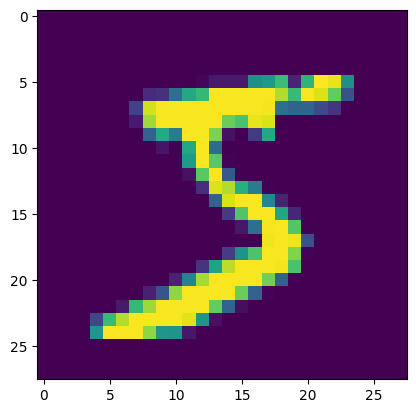

In [ ]:
plt.imshow(X_train[0])

In [ ]:
only_zeros = X_train[y_train==0]

In [ ]:
only_zeros.shape

(5923, 28, 28)

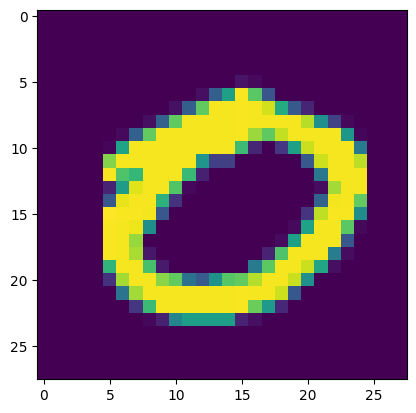

In [ ]:
plt.imshow(only_zeros[14])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

In [ ]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28, 28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
# FINAL OUTPUT LAYER
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
codings_size = 100
generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28, 28]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
GAN = Sequential([generator, discriminator])

In [ ]:
discriminator.trainable = False

In [ ]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
batch_size = 32

In [ ]:
my_data = only_zeros

In [ ]:
import tensorflow as tf

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [ ]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [ ]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
epochs = 5

In [ ]:
GAN.layers[0].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         118,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,634 (561.07 KB)

 Trainable params: 143,634 (561.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
GAN.layers[1].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,951 (519.34 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 132,951 (519.34 KB)

In [ ]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently on Epoch {epoch + 1}")
  i = 0
  for X_batch in dataset:
    i = i + 1
    if i % 100 == 0:
      print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")

    # DISCRIMINATOR TRAINING PHASE
    noise = tf.random.normal(shape=[batch_size, codings_size])
    gen_images = generator(noise)
    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
    y1 = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)
    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real, y1)
    # TRAIN GENERATOR
    noise = tf.random.normal(shape=[batch_size, codings_size])
    y2 = tf.constant([[1.0]] * batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise, y2)

Currently on Epoch 1


	 Currently on batch number 100 of 185
Currently on Epoch 2
	 Currently on batch number 100 of 185
Currently on Epoch 3
	 Currently on batch number 100 of 185
Currently on Epoch 4
	 Currently on batch number 100 of 185
Currently on Epoch 5
	 Currently on batch number 100 of 185


In [ ]:
noise = tf.random.normal(shape=[10, codings_size])

In [ ]:
noise.shape

TensorShape([10, 100])

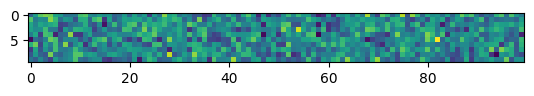

In [ ]:
plt.imshow(noise)

In [ ]:
images = generator(noise)

In [ ]:
images.shape

TensorShape([10, 28, 28])

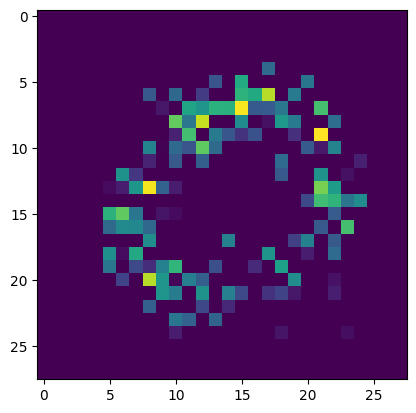

In [ ]:
plt.imshow(images[0])

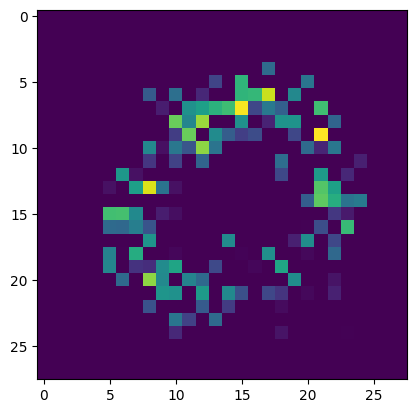

In [ ]:
plt.imshow(images[1])